# Leaf Classification

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('E:/project_dataset/leaf-classification/train.csv/train.csv')

In [3]:
data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:
data.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [5]:
data.info

<bound method DataFrame.info of        id                species   margin1   margin2   margin3   margin4  \
0       1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1       2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2       3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3       5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4       6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   
..    ...                    ...       ...       ...       ...       ...   
985  1575   Magnolia_Salicifolia  0.060547  0.119140  0.007812  0.003906   
986  1578            Acer_Pictum  0.001953  0.003906  0.021484  0.107420   
987  1581     Alnus_Maximowiczii  0.001953  0.003906  0.000000  0.021484   
988  1582          Quercus_Rubra  0.000000  0.000000  0.046875  0.056641   
989  1584         Quercus_Afares  0.023438  0.019531  0.031250  0.015625   

      margin5   margin6   margin7  margin8  ...  textur

In [6]:
data.shape

(990, 194)

In [7]:
data.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

In [8]:
data.corr()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,1.000000,-0.011673,-0.027565,-0.059533,0.001639,-0.002419,-0.051818,0.061214,-0.039509,-0.070954,...,-0.040292,-0.005132,-0.043101,0.063337,-0.007915,-0.000823,0.026319,0.032873,0.024299,0.035396
margin1,-0.011673,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,-0.027565,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.059533,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,0.001639,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,-0.000823,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,0.026319,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,0.032873,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,0.024299,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


In [9]:

x=data.drop(['id', 'species'], axis=1).values #Drop the label column

In [10]:
x[0]


array([0.007812  , 0.023438  , 0.023438  , 0.003906  , 0.011719  ,
       0.009766  , 0.027344  , 0.        , 0.001953  , 0.033203  ,
       0.013672  , 0.019531  , 0.066406  , 0.        , 0.029297  ,
       0.        , 0.03125   , 0.011719  , 0.        , 0.025391  ,
       0.023438  , 0.001953  , 0.        , 0.015625  , 0.        ,
       0.03125   , 0.        , 0.013672  , 0.029297  , 0.015625  ,
       0.011719  , 0.003906  , 0.025391  , 0.        , 0.001953  ,
       0.011719  , 0.009766  , 0.041016  , 0.037109  , 0.019531  ,
       0.        , 0.009766  , 0.021484  , 0.015625  , 0.007812  ,
       0.013672  , 0.027344  , 0.0625    , 0.        , 0.017578  ,
       0.03125   , 0.        , 0.044922  , 0.007812  , 0.025391  ,
       0.003906  , 0.013672  , 0.015625  , 0.013672  , 0.003906  ,
       0.005859  , 0.003906  , 0.019531  , 0.001953  , 0.00064671,
       0.00060945, 0.0005765 , 0.0005534 , 0.00051575, 0.00049629,
       0.00047438, 0.00045284, 0.00045398, 0.00042897, 0.00041

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='count', ylabel='species'>

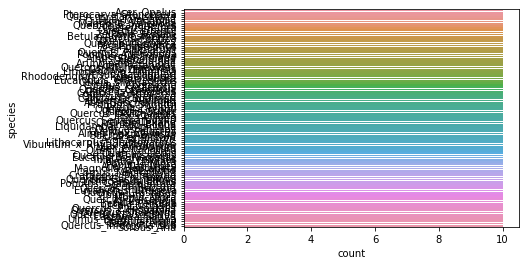

In [12]:
sns.countplot(y='species',data = data)

<AxesSubplot:>

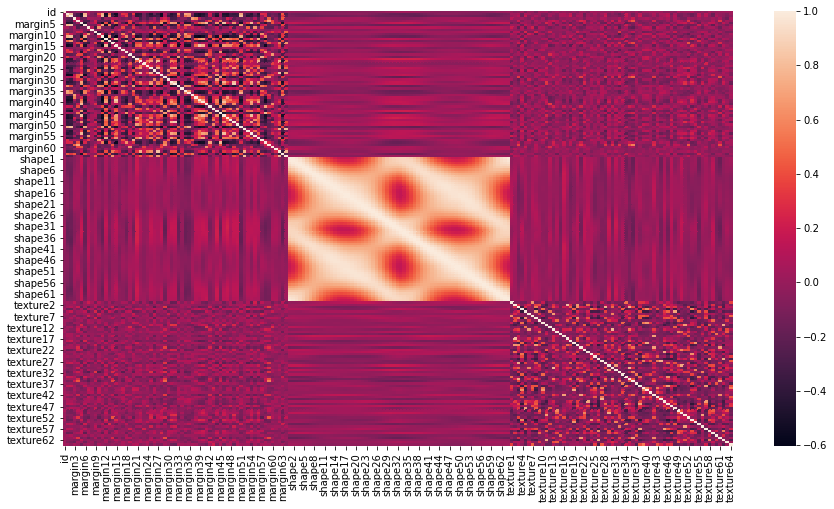

In [13]:
plt.figure(figsize= (15,8))
sns.heatmap(data=data.corr())

In [14]:
data['species'].value_counts()

Ginkgo_Biloba                   10
Lithocarpus_Edulis              10
Quercus_Rhysophylla             10
Acer_Pictum                     10
Populus_Adenopoda               10
                                ..
Viburnum_x_Rhytidophylloides    10
Betula_Pendula                  10
Cytisus_Battandieri             10
Cotinus_Coggygria               10
Quercus_x_Hispanica             10
Name: species, Length: 99, dtype: int64

In [15]:
le = LabelEncoder().fit(data['species'])

In [16]:
y = le.transform(data['species']) #Assign label column

In [17]:
y

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

In [18]:
scaler = StandardScaler().fit(x)

In [19]:
x = scaler.transform(x)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf=RandomForestClassifier()

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
y_pred=clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))


[[5 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 5]]


In [24]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9562289562289562
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         1
          13       0.75      1.00      0.86         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         3
        

C:\Users\Yatendra sharma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
test=pd.read_csv('E:/project_dataset/leaf-classification/test.csv/test.csv')

In [26]:
test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [27]:
test_ids = test.pop('id')

In [28]:

x_test = test.values

In [29]:
x_test = scaler.transform(x_test)
y_test = clf.predict_proba(x_test) #Get probability values for each class

In [30]:

submission = pd.DataFrame(y_test, index=test_ids, columns=le.classes_) #Create a dataframe to create submission file

In [31]:

submission.head(5)

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
4,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00
7,0.00,0.00,0.01,0.03,0.00,0.01,0.02,0.00,0.00,0.02,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.02
9,0.01,0.44,0.00,0.00,0.04,0.00,0.00,0.01,0.01,0.03,...,0.00,0.0,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.03
12,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,...,0.02,0.0,0.00,0.00,0.00,0.02,0.07,0.03,0.00,0.01
13,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.13,0.00,...,0.00,0.0,0.01,0.01,0.01,0.00,0.02,0.00,0.00,0.00


In [32]:
submission.to_csv('submission_leaf_classification.csv') #Export dataframe into CSV file